# Data Screening

In [106]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [107]:
# Load dataset
data = pd.read_csv("/content/gym_members_exercise_tracking.csv")

data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [108]:
# Cek informasi dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

# Statistika Deskriptif

In [109]:
# Statistika Deskriptif
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


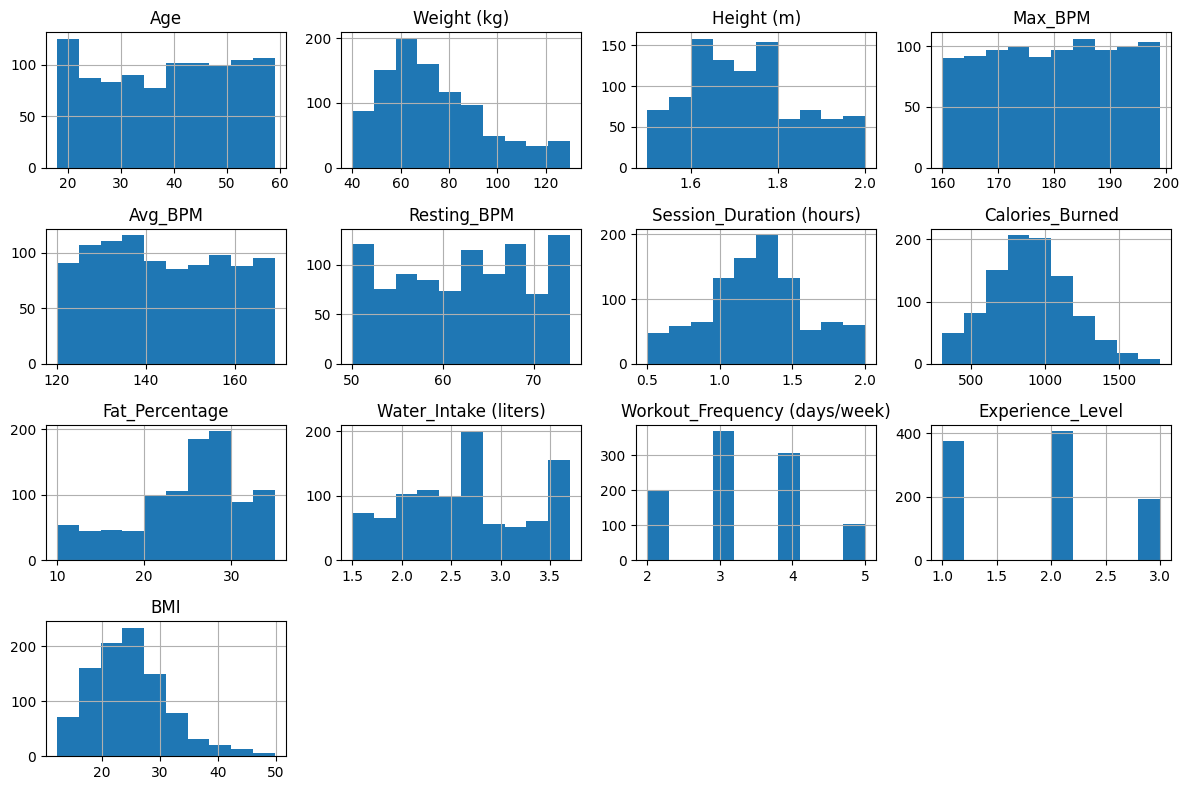

In [110]:
# Histogram untuk setiap variabel numerik
import matplotlib.pyplot as plt

data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [111]:
# Identify numerical independent variables (excluding the dependent variable)
numerical_independent_vars = data.select_dtypes(include=np.number).columns.tolist()
try:
    numerical_independent_vars.remove('dependent_variable_column') # Replace 'dependent_variable_column'
except ValueError:
    pass  # Handle case where dependent variable is not in the numerical columns

# Descriptive Statistics
print(data[numerical_independent_vars].describe())



              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

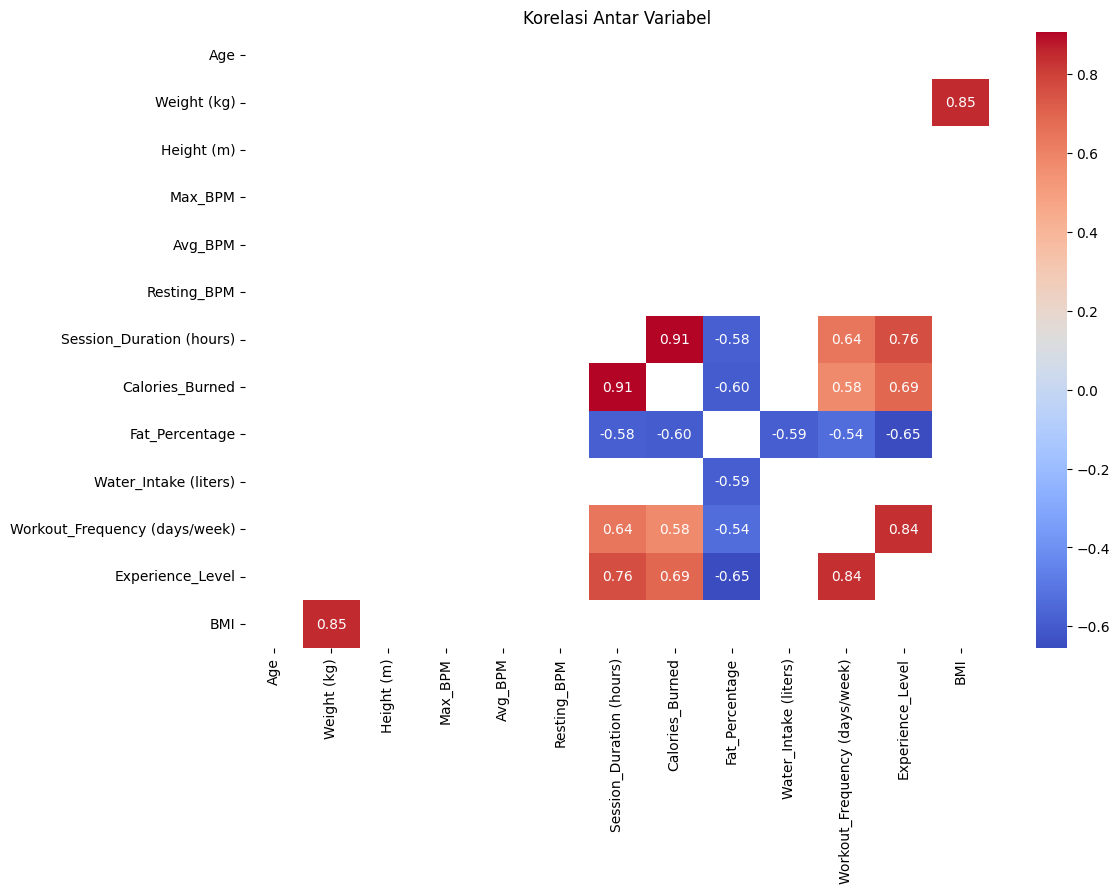

In [112]:
# Membuat heatmap korelasi
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Menyaring korelasi kuat (0.5 sampai 1 dan -0.5 sampai -1)
strong_corr = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]
strong_corr = strong_corr.replace([1, -1], np.nan)  # Menghilangkan korelasi diri sendiri (1 atau -1)


plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()

In [113]:
# Mencari pasangan variabel dengan korelasi kuat
threshold = 0.5  # Batas korelasi kuat
strong_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation_value = correlation_matrix.iloc[i, j]
        if abs(correlation_value) >= threshold:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_pairs.append((var1, var2, correlation_value))

# Menampilkan pasangan variabel yang memiliki korelasi kuat
print("Pasangan variabel dengan korelasi kuat:\n")
for var1, var2, correlation_value in strong_pairs:
    print(f"{var1} dan {var2}: korelasi = {correlation_value:.2f}")


Pasangan variabel dengan korelasi kuat:

Weight (kg) dan BMI: korelasi = 0.85
Session_Duration (hours) dan Calories_Burned: korelasi = 0.91
Session_Duration (hours) dan Fat_Percentage: korelasi = -0.58
Session_Duration (hours) dan Workout_Frequency (days/week): korelasi = 0.64
Session_Duration (hours) dan Experience_Level: korelasi = 0.76
Calories_Burned dan Fat_Percentage: korelasi = -0.60
Calories_Burned dan Workout_Frequency (days/week): korelasi = 0.58
Calories_Burned dan Experience_Level: korelasi = 0.69
Fat_Percentage dan Water_Intake (liters): korelasi = -0.59
Fat_Percentage dan Workout_Frequency (days/week): korelasi = -0.54
Fat_Percentage dan Experience_Level: korelasi = -0.65
Workout_Frequency (days/week) dan Experience_Level: korelasi = 0.84


Jadi Karena Data 'Calories_Burned' Berkorelasi Kuat dengan banyak data yang lain, maka kita simpulkan bahwa data 'Calories_Burned' akan kita analisa.

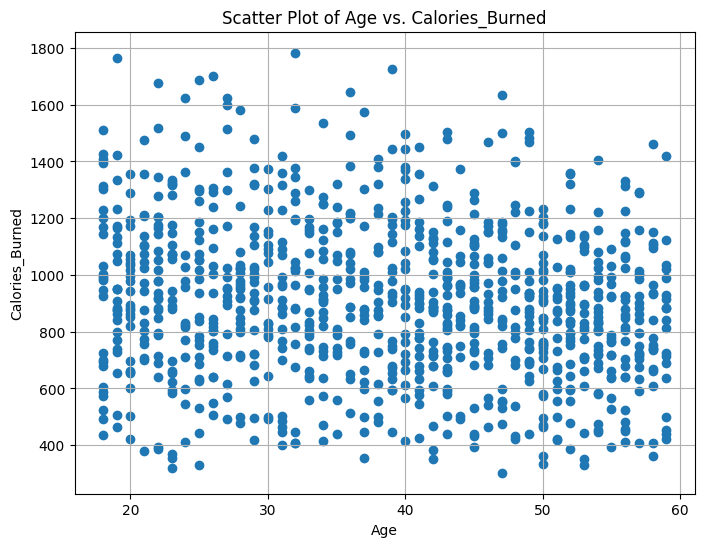

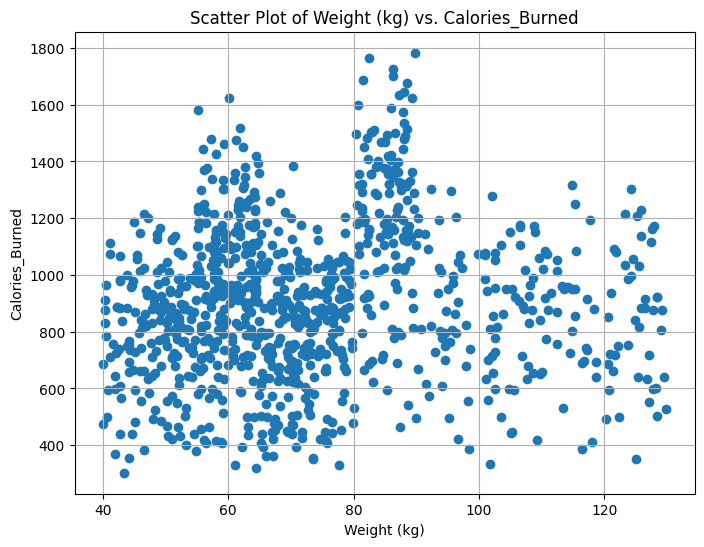

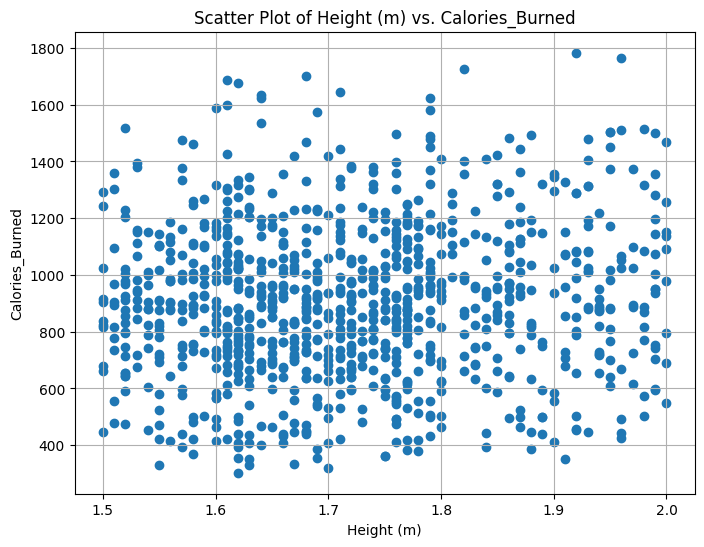

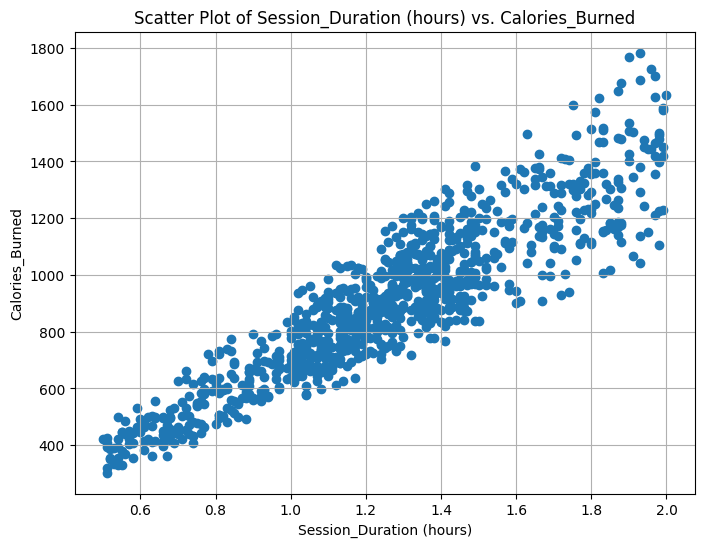

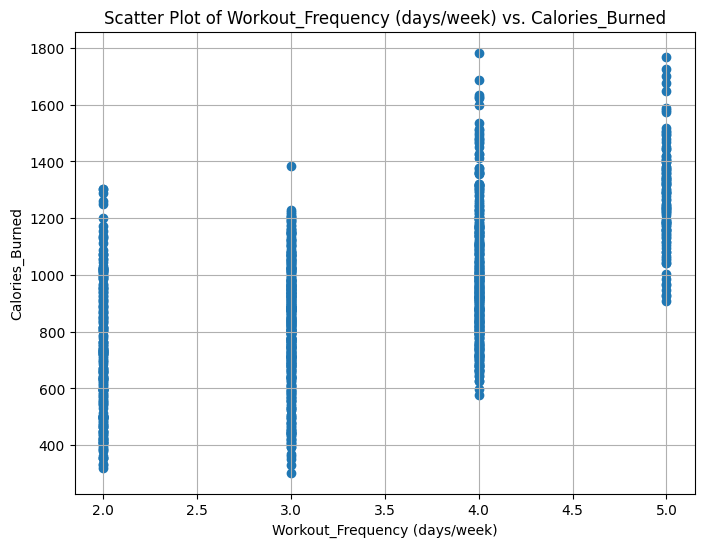

In [114]:
import matplotlib.pyplot as plt
X = data[['Age', 'Weight (kg)', 'Height (m)', 'Session_Duration (hours)', 'Workout_Frequency (days/week)']]
y = data['Calories_Burned']
# Assuming X and y are already defined as in your previous code
column_mapping = {
    'x1': 'Age',
    'x2': 'Weight (kg)',
    'x3': 'Height (m)',
    'x4': 'Session_Duration (hours)',
    'x5': 'Workout_Frequency (days/week)'
}

# Create the scatter plot for each independent variable
for col in X.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel('Calories_Burned')
    original_name = column_mapping.get(col, col)  # Mendapatkan nama asli dari kamus, jika tidak ada, gunakan nama kolom saat ini
    plt.title(f'Scatter Plot of {original_name} vs. Calories_Burned')
    plt.grid(True)
    plt.show()

# **UJI ANALISIS LINEAR SEDERHANA**


**Uji Hipotesis**
* H0: Tidak ada hubungan linear antara Durasi Olahraga dan Calories_Burned.
* H1: Terdapat hubungan linear antara Durasi Olahraga dan Calories_Burned.


In [115]:
import scipy.stats as stats


# Rename
data.rename(columns={'Session_Duration (hours)':'x1',
                     'Calories_Burned':'y'}, inplace=True)

# Nama VAriabel Yang Baru
X = data[['x1']]
y = data['y']


data = data[['x1','y']]
data.head()

,x1,y
0,1.69,1313.0
1,1.30,883.0
2,1.11,677.0
3,0.59,532.0
4,0.64,556.0


In [116]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     4569.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:39:24   Log-Likelihood:                -5989.7
No. Observations:                 973   AIC:                         1.198e+04
Df Residuals:                     971   BIC:                         1.199e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4465     13.907     -0.104      0.9

*   y_topi = β0 + β1 (x1)
*   y_topi = -1.4465  + 721.7860  (x1)

1. Uji Hipotesis
* h0 = B1 = 0, tidak terdapat pengaruh signifikan secara serentak  variabel independent terhadap variabel dependent
* h1 = Minimal ada 1 Bj ≠ 0, terdapat pengaruh signifikan secara serentak variabel independent terhadap variabel dependent

2. Menentukan Level of significance atau α sebesar 5% atau 0.05
3. Menentukan Uji Statistik

## UJI F


In [117]:
# Import library yang diperlukan
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f

# Mendefinisikan hipotesis
h0 = """
B1 = 0, tidak terdapat pengaruh signifikan secara serentak
variabel independent terhadap variabel dependent
"""
h1 = """
Minimal ada 1 Bj ≠ 0, terdapat pengaruh signifikan secara serentak
variabel independent terhadap variabel dependent
"""

# Menentukan alfa
alfa = 0.05

# Derajat kebebasan
k = X.shape[1] - 1  # jumlah variabel independen (tidak termasuk intercept)
n = len(y)          # jumlah observasi
df1 = k             # derajat bebas pembilang
df2 = n - k - 1     # derajat bebas penyebut

# Nilai F hitung
fhitung = model.fvalue

# Nilai F tabel
ftabel = f.ppf(1-alfa, df1, df2)

# Print hasil
print('Nilai F tabel:', ftabel)
print('Nilai F hitung:', fhitung)

# Kesimpulan
if fhitung > ftabel:
    print(f"Karena F hitung > F tabel maka {h1} (Tolak H0)")
else:
    print(f"Karena F hitung < F tabel maka {h0} (Gagal tolak H0)")


Nilai F tabel: 3.8510534112005916
Nilai F hitung: 4568.674447477883
Karena F hitung > F tabel maka 
Minimal ada 1 Bj ≠ 0, terdapat pengaruh signifikan secara serentak
variabel independent terhadap variabel dependent
 (Tolak H0)


4. Menentukan Titik Kritis Pengujian
*   Dengan α sebesar 0.05, H0 ditolak jika Fhit > Ftabel

5. Kesimpulan Hasil Pengujian dan Interpretasi
*   Berdasarkan hasil perhitungan diatas, F-hitung = 4568 > F-tabel = 3.85, sehingga H0 ditolak yang artinya terdapat pengaruh signifikan secara serentak
variabel independent terhadap variabel dependent

## UJI Z

In [118]:
# Import library yang diperlukan
import numpy as np

# Hipotesis
h0_z = "B1 = 0, tidak terdapat pengaruh signifikan variabel independen x1 terhadap y"
h1_z = "B1 ≠ 0, terdapat pengaruh signifikan variabel independen x1 terhadap y"

# Menentukan alfa
alfa = 0.05

# Koefisien regresi dan standard error
coef = model.params['x1']  # Koefisien regresi x1
std_error = model.bse['x1']  # Standard error x1

# Nilai Z hitung
z_hitung = coef / std_error

# Nilai Z tabel (dengan distribusi normal)
from scipy.stats import norm
z_tabel = norm.ppf(1 - alfa / 2)

# Print hasil
print('Nilai Z tabel:', z_tabel)
print('Nilai Z hitung:', z_hitung)

# Kesimpulan
if abs(z_hitung) > z_tabel:
    print(f"Karena |Z hitung| > Z tabel, maka {h1_z} (Tolak H0)")
else:
    print(f"Karena |Z hitung| < Z tabel, maka {h0_z} (Gagal tolak H0)")


Nilai Z tabel: 1.959963984540054
Nilai Z hitung: 67.59197028847343
Karena |Z hitung| > Z tabel, maka B1 ≠ 0, terdapat pengaruh signifikan variabel independen x1 terhadap y (Tolak H0)


4. Menentukan Titik Kritis Pengujian
*   Dengan α sebesar 0.05, H0 ditolak jika Zhit > Ztabel
5. Kesimpulan Hasil Pengujian dan Interpretasi
Dengan α sebesar 0.05 didapatkan bahwa nilai
Z hitung = 67.6, P-Value yang didapat = 0, dan nilai Z-tabel sebesar 1.96.
- Nilai |Z-hitung_1| = 67.6 > Z-tabel = 1.96 sehingga dapat disimpulkan H0 ditolak yang artinya bahwa Durasi Olahraga berpengaruh signifikan pada Pembaaran kalori


## GRAFIK

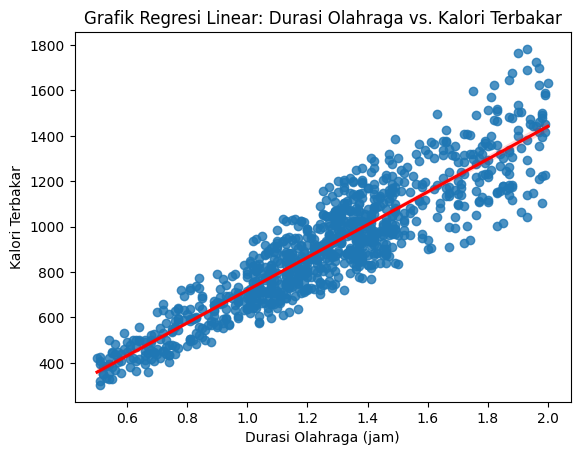

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns



# Create the regression plot
sns.regplot(x='x1', y='y', data=data, line_kws={'color': 'red'})
plt.title('Grafik Regresi Linear: Durasi Olahraga vs. Kalori Terbakar')
plt.xlabel('Durasi Olahraga (jam)')
plt.ylabel('Kalori Terbakar')
plt.show()

Plot regresi menunjukkan hubungan linier positif yang kuat antara durasi latihan (dalam jam) dan kalori yang terbakar.  Hasil yang signifikan secara statistik dari uji F dan uji Z (nilai p mendekati nol dan statistik uji jauh melebihi nilai kritis) mengkonfirmasi hubungan ini.  Persamaan regresi, `Kalori yang Dibakar = -1.4465 + 721.7860 * (Durasi Olahraga)`, mengukur hubungan ini, yang menunjukkan bahwa untuk setiap jam olahraga, sekitar 721.79 kalori dibakar.  Model ini menjelaskan sejumlah besar varians kalori yang dibakar, yang dibuktikan dengan statistik F yang signifikan.  Intinya, semakin lama sesi olahraga, semakin banyak kalori yang dibakar, dengan tingkat kepercayaan yang tinggi berdasarkan data yang tersedia.


# **UJI ANALISIS LINEAR BERGANDA**


## Import Data


In [120]:
data = pd.read_csv("/content/gym_members_exercise_tracking.csv")
# Pilih variabel dependen dan independen
# Memprediksi Hubungan 'Calories_Burned' berdasarkan variabel lainnya
X = data[['Age', 'Weight (kg)', 'Height (m)', 'Session_Duration (hours)', 'Workout_Frequency (days/week)']]  # Independen
y = data['Calories_Burned']  # Dependen

In [121]:
# Rename
data.rename(columns={'Age':'x1', 'Weight (kg)':'x2', 'Height (m)':'x3',
                     'Session_Duration (hours)':'x4', 'Workout_Frequency (days/week)':'x5',
                     'Calories_Burned':'y'}, inplace=True)

# Nama VAriabel Yang Baru
X = data[['x1', 'x2', 'x3', 'x4', 'x5']]
y = data['y']


data = data[['x1', 'x2', 'x3', 'x4', 'x5', 'y']]
data.head()

,x1,x2,x3,x4,x5,y
0,56,88.3,1.71,1.69,4,1313.0
1,46,74.9,1.53,1.30,4,883.0
2,32,68.1,1.66,1.11,4,677.0
3,25,53.2,1.70,0.59,3,532.0
4,38,46.1,1.79,0.64,3,556.0


In [122]:
# Membuat Model OLS
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1163.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:39:25   Log-Likelihood:                -5889.2
No. Observations:                 973   AIC:                         1.179e+04
Df Residuals:                     967   BIC:                         1.182e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -189.5194     48.569     -3.902      0.0

### Model Regresi


* y_topi = β0 + β1 (x1) + β2 (x2) + β3 (x3) + β4 (x4) + β5 (x5)

* y_topi = -189.519 + -2.9491(x1) + 1.0304(x2) + 133.6614(x3) + 725.9239(x4) + -2.8257(x5)

* Keterangan:

- y_topi: Variabel dependen (Calories_Burned) yang diprediksi.
- x1: Age
- x2: Weight (kg)
- x3: Height (m)
- x4: Session_Duration (hours)
- x5: Workout_Frequency (days/week)
- -189.519 : Intercept (nilai y_topi ketika semua variabel independen bernilai 0).
5.1221, 1.1635, 11.2156, 94.6382, 10.2383: Koefisien regresi untuk masing-masing variabel independen.



### **Menghasilkan Nilai Prediksi dan Nilai Residualnya**


In [123]:
prediksi = model.predict(X)
print(prediksi.head())

0    1180.383493
1     888.898046
2     802.629730
3     438.612314
4     441.283176
dtype: float64


In [124]:
residual = model.resid
print(residual.head())

0    132.616507
1     -5.898046
2   -125.629730
3     93.387686
4    114.716824
dtype: float64


## UJI F

1. Menentukan Hipoteesis Null dengan Hipotesis Alternatif
*   H0 : β1 = β2 = 0
*   H1 : minimal ada satu βj ≠ 0, dimana j = 1, 2
2. Menentukan Level of significance atau α sebesar 5% atau 0.05
3. Menentukan Uji Statistik F

In [125]:
# Mendefinisikan Hipotesis
h0 = """
H0: β1 = β2 = β3 = β4 = β5 = 0
(Tidak terdapat pengaruh signifikan secara serentak dari variabel independen
(Age, Weight, Height, Session Duration, Workout Frequency)
terhadap variabel dependen (Calories Burned)).
"""
h1 = """
H1: Minimal ada satu βj ≠ 0, dimana j = 1, 2, 3, 4, 5
(Terdapat pengaruh signifikan secara serentak dari minimal satu variabel independen
(Age, Weight, Height, Session Duration, Workout Frequency)
terhadap variabel dependen (Calories Burned)).
"""




# Menentukan alfa
alfa = 0.05

# Mencari F tabel
from scipy.stats import f
k = X.shape[1] - 1  # tidak termasuk intercept
n = len(y)

# Derajat kebebasan untuk pembilang dan penyebut
df1 = k
df2 = n - k - 1

fhitung = model.fvalue
ftabel = f.ppf(1-alfa, df1, df2)
print('Nilai F tabel:', ftabel)
print('Nilai F hitung :', fhitung)

# Kesimpulan
if fhitung > ftabel:
    print(f"Karena f hitung > f tabel maka {h1} (Tolak H0)")
else:
    print(f"Karena f hitung < f tabel maka {h1} (Gagal tolak H0)")

Nilai F tabel: 2.2233586340160416
Nilai F hitung : 1163.1444468660316
Karena f hitung > f tabel maka 
H1: Minimal ada satu βj ≠ 0, dimana j = 1, 2, 3, 4, 5
(Terdapat pengaruh signifikan secara serentak dari minimal satu variabel independen 
(Age, Weight, Height, Session Duration, Workout Frequency) 
terhadap variabel dependen (Calories Burned)).
 (Tolak H0)


4. Menentukan Titik Kritis Pengujian
*   Dengan α sebesar 0.05, H0 ditolak jika Fhit > Ftabel

5. Menentukan Kesimpulan Hasil Pengujian dan Interpretasi
*   Berdasarkan hasil perhitungan diatas, dengan α sebesar 0.05 didapatkan bahwa nilai F-hitung sebesar 1163 (menurut perhitungan manual / OLS) dan nilai F-tabel sebesar 2.2. Jadi, Karena F-hitung = 61.49 > F-tabel = 1.79, sehingga H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya

## Uji Z

**Uji-Z bertujuan untuk menguji signifikansi pengaruh masing-masing variabel independen (Age, Weight, Height, Session Duration, Workout Frequency) terhadap variabel dependen (Calories Burned) secara individual.**

1. Menentukan Hipotesis Null dengan Hipotesis Alternatif
*   H0 : β1 = 0 : Tidak ada pengaruh signifikan secara individual variabel independen terhadap variabel dependen.
*   H1 : β1 ≠ : Ada pengaruh signifikan secara individual variabel independen terhadap variabel dependen.
2. Menentukan Level of significance atau α sebesar 5% atau 0.05
3. Menentukan Uji Statistik Z

In [126]:
from scipy.stats import norm

# Mendefinisikan Hipotesis
H0 = 'Tidak ada pengaruh signifikan secara individu variabel independen terhadap variabel dependen'
H1 = 'Ada pengaruh signifikan secara individu variabel independen terhadap variabel dependen'

# Menentukan alfa
alfa = 0.05

# Variabel untuk menghitung jumlah yang signifikan dan tidak
jumlah_signifikan = 0
jumlah_tidak_signifikan = 0

# Uji z dan kesimpulan untuk setiap variabel
for var_name, z_hitung in zip(model.params.index, model.tvalues):  # Menggunakan tvalues sebagai pengganti z-hitung
    z_tabel = norm.ppf(1 - alfa / 2)  # Nilai z-tabel untuk uji dua arah

    print(f"\nUji z untuk {var_name}:")
    print(f"z-hitung: {z_hitung:.4f}")
    print(f"z-tabel: {z_tabel:.4f}")

    # Kesimpulan berdasarkan uji z
    if abs(z_hitung) > z_tabel:  # Menggunakan abs(z_hitung) karena uji dua sisi
        print(f"Kesimpulan: {H1}")
        jumlah_signifikan += 1
    else:
        print(f"Kesimpulan: {H0}")
        jumlah_tidak_signifikan += 1

# Menampilkan jumlah variabel yang signifikan dan tidak signifikan
print(f"\nJumlah variabel signifikan: {jumlah_signifikan}")
print(f"Jumlah variabel tidak signifikan: {jumlah_tidak_signifikan}")


Uji z untuk const:
z-hitung: -3.9020
z-tabel: 1.9600
Kesimpulan: Ada pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x1:
z-hitung: -10.8367
z-tabel: 1.9600
Kesimpulan: Ada pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x2:
z-hitung: 6.1420
z-tabel: 1.9600
Kesimpulan: Ada pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x3:
z-hitung: 4.7996
z-tabel: 1.9600
Kesimpulan: Ada pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x4:
z-hitung: 57.5034
z-tabel: 1.9600
Kesimpulan: Ada pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Uji z untuk x5:
z-hitung: -0.5959
z-tabel: 1.9600
Kesimpulan: Tidak ada pengaruh signifikan secara individu variabel independen terhadap variabel dependen

Jumlah variabel signifikan: 5
Jumlah variabel tidak signifikan: 1


4. Menentukan Titik Kritis Pengujian
*   Dengan α sebesar 0.05, H0 ditolak jika Zhit > Ztabel

5. Menentukan Kesimpulan Hasil Pengujian dan Interpretasi

- x1 (Age)
* t-hitung: -10.8367,
t-tabel: ±1.96 (asumsi alfa = 0.05, uji dua sisi)
Interpretasi: Karena |t-hitung| (|-10.8367|) > t-tabel (1.96), maka H0 ditolak. Artinya, variabel Age (x1) memiliki pengaruh yang signifikan terhadap Calories Burned. Tanda negatif pada t-hitung menunjukkan bahwa hubungan antara Age dan Calories Burned bersifat negatif (invers). Artinya, semakin tua usia, semakin sedikit kalori yang dibakar (dengan asumsi faktor lain konstan).


- x2 (Weight)

* t-hitung: 6.1420,
t-tabel: ±1.96
Interpretasi: Karena |t-hitung| (|6.1420|) > t-tabel (1.96), maka H0 ditolak. Artinya, variabel Weight (x2) memiliki pengaruh yang signifikan terhadap Calories Burned. Tanda positif pada t-hitung menunjukkan bahwa hubungan antara Weight dan Calories Burned bersifat positif. Artinya, semakin berat badan, semakin banyak kalori yang dibakar (dengan asumsi faktor lain konstan).

- x3 (Height)
* t-hitung: 4.7996
t-tabel: ±1.96
Interpretasi: Karena |t-hitung| (|4.7996|) > t-tabel (1.96), maka H0 ditolak. Artinya, variabel Height (x3) memiliki pengaruh yang signifikan terhadap Calories Burned. Tanda positif pada t-hitung menunjukkan bahwa hubungan antara Height dan Calories Burned bersifat positif. Artinya, semakin tinggi badan, semakin banyak kalori yang dibakar (dengan asumsi faktor lain konstan).

- x4 (Session_Duration)
* t-hitung: 57.5034,
t-tabel: ±1.96
Interpretasi: Karena |t-hitung| (|57.5034|) > t-tabel (1.96), maka H0 ditolak. Artinya, variabel Session_Duration (x4) memiliki pengaruh yang signifikan terhadap Calories Burned. Tanda positif pada t-hitung menunjukkan bahwa hubungan antara Session_Duration dan Calories Burned bersifat positif. Artinya, semakin lama durasi sesi latihan, semakin banyak kalori yang dibakar (dengan asumsi faktor lain konstan).

- x5 (Workout_Frequency)
* t-hitung: -0.5959, t-tabel: ±1.96
Interpretasi: Karena |t-hitung| (|-0.5959|) < t-tabel (1.96), maka H0 gagal ditolak. Artinya, variabel Workout_Frequency (x5) tidak memiliki pengaruh yang signifikan terhadap Calories Burned.

In [127]:
adjusted_r_squared = model.rsquared_adj
print(f"R-Squared Adjusted : {adjusted_r_squared}")
print(f'\nArtinya sekitar {adjusted_r_squared*100}% variabel dependen yaitu dapat dijelaskan/dipengaruhi oleh variabel dependennya.\nsementara sisanya {(1-adjusted_r_squared)*100}% dipengaruhi oleh variabel yang tidak diketahui')

R-Squared Adjusted : 0.8566947065766151

Artinya sekitar 85.6694706576615% variabel dependen yaitu dapat dijelaskan/dipengaruhi oleh variabel dependennya.
sementara sisanya 14.330529342338494% dipengaruhi oleh variabel yang tidak diketahui


Sekitar 85.67% variasi dalam Calories Burned (variabel dependen) dapat dijelaskan oleh variasi dalam variabel independen (Age, Weight, Height, Session Duration, Workout Frequency) yang termasuk dalam model.

In [128]:
# Split dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
# Inisialisasi model regresi linier
model = LinearRegression()

# Latih model pada data training
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 11499.414565286294
R^2 Score: 0.8621586930669007


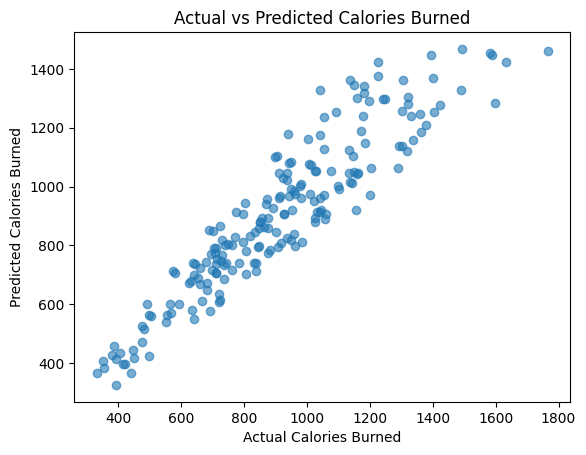

Coefficients: [ 0.00000000e+00 -2.58259483e+00  9.19626234e-01  1.40213670e+02
  7.24596377e+02 -6.73692803e-02]
Intercept: -215.59593467900822


In [130]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualisasi hasil prediksi vs nilai aktual
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted Calories Burned")
plt.show()

# Coefficients dan Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Grafik tersebut menunjukkan hubungan antara kalori yang sebenarnya dibakar dengan kalori yang diprediksi oleh model regresi. Titik-titik data yang cenderung mengikuti garis diagonal menunjukkan bahwa model memiliki kemampuan prediksi yang cukup baik.



---






Berdasarkan analisis data dan visualisasi yang telah dilakukan, terdapat beberapa kesimpulan yang dapat diambil:

**Analisis Korelasi:** Terdapat korelasi kuat antara 'Calories_Burned' dengan beberapa variabel lain.  Hal ini menunjukkan bahwa 'Calories_Burned' dipengaruhi oleh variabel-variabel tersebut dan menjadi fokus analisis lebih lanjut.

**Analisis Regresi Linear Sederhana (Durasi Olahraga vs. Kalori Terbakar):**

*   Terdapat hubungan linier positif yang kuat antara durasi olahraga dan kalori yang terbakar.
*   Uji F dan uji Z menunjukkan hubungan ini signifikan secara statistik.
*   Persamaan regresi yang dihasilkan dapat digunakan untuk memprediksi kalori yang terbakar berdasarkan durasi olahraga.
*   Grafik regresi memperlihatkan tren hubungan positif antara durasi olahraga dan jumlah kalori yang terbakar.

**Analisis Regresi Linear Berganda (dengan beberapa variabel independen):**

*   Model regresi linear berganda menunjukkan bahwa beberapa variabel independen (seperti *Age*, *Weight*, *Height*, dan *Session_Duration*) berpengaruh signifikan terhadap *Calories_Burned*. Namun, *Workout_Frequency* tidak menunjukkan pengaruh yang signifikan.
*   Persamaan regresi yang dihasilkan dapat digunakan untuk memprediksi kalori yang terbakar dengan mempertimbangkan beberapa faktor.
*   Adjusted R-squared yang tinggi menunjukkan model ini mampu menjelaskan sebagian besar variabilitas dalam data.
*   Hasil evaluasi model (*Mean Squared Error* dan *R^2 Score*) pada data testing menunjukkan akurasi model. Plot aktual vs prediksi memberikan gambaran visual tentang performansi model.

Secara keseluruhan, analisis menunjukkan bahwa durasi olahraga merupakan faktor utama yang mempengaruhi kalori yang terbakar.  Analisis regresi berganda memperkaya pemahaman dengan memasukkan faktor-faktor lain yang juga berkontribusi, meskipun dengan tingkat pengaruh yang berbeda.  Model yang dibangun dapat digunakan untuk memprediksi kalori yang terbakar dan memberikan wawasan berharga terkait aktivitas olahraga dan pembakaran kalori.


# Uji VIF

In [131]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Uji VIF (Variance Inflation Factor)
X = data[['x1', 'x2', 'x3', 'x4', 'x5']]  # Independent variables
X = sm.add_constant(X) # Adding a constant

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

# Interpretasi
# Nilai VIF di atas 10 umumnya dianggap menunjukkan multikolinearitas yang tinggi.
# Periksa variabel dengan nilai VIF yang tinggi dan pertimbangkan untuk menghapusnya
# dari model jika multikolinearitas bermasalah.

,feature,VIF
0,const,215.472070
1,x1,1.002726
2,x2,1.155075
3,x3,1.154363
4,x4,1.711149
5,x5,1.710485


*   Sebagian besar variabel dalam model memiliki VIF di bawah 2, yang berarti tidak ada masalah multikolinearitas yang signifikan.
*  Interpretasi : Nilai VIF di bawah 2 menunjukkan bahwa korelasi antara variabel independen relatif rendah. Hal ini mengindikasikan bahwa multikolinearitas tidak menjadi masalah dalam model regresi.

- Kesimpulan : Nilai VIF yang rendah (di bawah 2) adalah indikator yang baik untuk model regresi. Model dianggap cukup stabil dan koefisien regresi dapat diinterpretasikan dengan andal. Tidak diperlukan tindakan lebih lanjut untuk mengatasi multikolinearitas.

# Kesimpulan Akhir

**Analisis Deskriptif:**

- Dataset berisi informasi tentang aktivitas olahraga anggota gym, meliputi usia, berat badan, tinggi badan, durasi sesi olahraga, frekuensi olahraga per minggu, dan kalori yang terbakar.
- Statistik deskriptif memberikan gambaran umum tentang distribusi data, seperti nilai rata-rata, standar deviasi, minimum, maksimum, dan kuartil.
- Histogram dan diagram batang digunakan untuk memvisualisasikan distribusi data dan frekuensi variabel kategorikal.
- Heatmap korelasi menunjukkan adanya korelasi kuat antara beberapa variabel, terutama antara 'Calories_Burned' dengan variabel lainnya.


**Analisis Regresi Linear Sederhana (Durasi Olahraga vs. Kalori Terbakar):**

- Terdapat hubungan linier positif yang kuat antara durasi olahraga dan kalori yang terbakar.
Uji F dan uji Z menunjukkan hubungan ini signifikan secara statistik.
- Persamaan regresi yang dihasilkan dapat digunakan untuk memprediksi kalori yang terbakar berdasarkan durasi olahraga.
- Grafik regresi memperlihatkan tren hubungan positif antara durasi olahraga dan jumlah kalori yang terbakar.
- Analisis Regresi Linear Berganda (dengan beberapa variabel independen):

**Model regresi linear berganda menunjukkan bahwa beberapa variabel independen**
- (seperti Age, Weight, Height, dan Session_Duration) berpengaruh signifikan terhadap Calories_Burned. Namun, Workout_Frequency tidak menunjukkan pengaruh yang signifikan.
- Persamaan regresi yang dihasilkan dapat digunakan untuk memprediksi kalori yang terbakar dengan mempertimbangkan beberapa faktor.
- Adjusted R-squared yang tinggi menunjukkan model ini mampu menjelaskan sebagian besar variabilitas dalam data.
- Hasil evaluasi model (Mean Squared Error dan R^2 Score) pada data testing menunjukkan akurasi model. Plot aktual vs prediksi memberikan gambaran visual tentang performansi model.

**Uji VIF (Variance Inflation Factor):**

- Uji VIF menunjukkan bahwa tidak ada masalah multikolinearitas yang signifikan dalam model regresi.
- Nilai VIF yang rendah (di bawah 2) adalah indikator yang baik untuk model regresi. Model dianggap cukup stabil dan koefisien regresi dapat diinterpretasikan dengan andal. Tidak diperlukan tindakan lebih lanjut untuk mengatasi multikolinearitas.

**Kesimpulan Umum:**

- Durasi olahraga merupakan faktor utama yang mempengaruhi kalori yang terbakar. Semakin lama durasi olahraga, semakin banyak kalori yang terbakar.
- Faktor-faktor lain seperti usia, berat badan, dan tinggi badan juga berpengaruh terhadap kalori yang terbakar.
- Model regresi linear berganda yang dibangun dapat digunakan untuk memprediksi kalori yang terbakar dengan mempertimbangkan beberapa faktor.
- Model ini memiliki akurasi yang cukup baik dan dapat memberikan wawasan berharga terkait aktivitas olahraga dan pembakaran kalori.